### For reading stock data from yahoo

In [27]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

import yfinance as yf
from datetime import datetime

tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

company_list = []
for stock in tech_list:
    company_data = yf.download(stock, start=start, end=end)
    company_data['company_name'] = stock
    company_list.append(company_data)

df = pd.concat(company_list, axis=0)

df.tail(10)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price      Adj Close Close High  Low Open Volume company_name Adj Close Close  \
Ticker          AAPL  AAPL AAPL AAPL AAPL   AAPL                   GOOG  GOOG   
Date                                                                            
2024-12-06       NaN   NaN  NaN  NaN  NaN    NaN         AMZN       NaN   NaN   
2024-12-09       NaN   NaN  NaN  NaN  NaN    NaN         AMZN       NaN   NaN   
2024-12-10       NaN   NaN  NaN  NaN  NaN    NaN         AMZN       NaN   NaN   
2024-12-11       NaN   NaN  NaN  NaN  NaN    NaN         AMZN       NaN   NaN   
2024-12-12       NaN   NaN  NaN  NaN  NaN    NaN         AMZN       NaN   NaN   
2024-12-13       NaN   NaN  NaN  NaN  NaN    NaN         AMZN       NaN   NaN   
2024-12-16       NaN   NaN  NaN  NaN  NaN    NaN         AMZN       NaN   NaN   
2024-12-17       NaN   NaN  NaN  NaN  NaN    NaN         AMZN       NaN   NaN   
2024-12-18       NaN   NaN  NaN  NaN  NaN    NaN         AMZN       NaN   NaN   
2024-12-19       NaN   NaN  NaN  NaN  NaN    NaN         AMZN       NaN   NaN   

Price      High  ...       Low Open Volume   Adj Close       Close  \
Ticker     GOOG  ... MSFT MSFT MSFT   MSFT        AMZN        AMZN   
Date             ...                                                 
2024-12-06  NaN  ...  NaN  NaN  NaN    NaN  227.029999  227.029999   
2024-12-09  NaN  ...  NaN  NaN  NaN    NaN  226.089996  226.089996   
2024-12-10  NaN  ...  NaN  NaN  NaN    NaN  225.039993  225.039993   
2024-12-11  NaN  ...  NaN  NaN  NaN    NaN  230.259995  230.259995   
2024-12-12  NaN  ...  NaN  NaN  NaN    NaN  228.970001  228.970001   
2024-12-13  NaN  ...  NaN  NaN  NaN    NaN  227.460007  227.460007   
2024-12-16  NaN  ...  NaN  NaN  NaN    NaN  232.929993  232.929993   
2024-12-17  NaN  ...  NaN  NaN  NaN    NaN  231.149994  231.149994   
2024-12-18  NaN  ...  NaN  NaN  NaN    NaN  220.520004  220.520004   
2024-12-19  NaN  ...  NaN  NaN  NaN    NaN  224.226501  224.226501   

Price             High         Low        Open      Volume  
Ticker            AMZN        AMZN        AMZN        AMZN  
Date                                                        
2024-12-06  227.149994  220.600006  220.750000  44178100.0  
2024-12-09  230.080002  225.669998  227.210007  46819400.0  
2024-12-10  229.059998  224.199997  226.089996  31199900.0  
2024-12-11  231.199997  226.259995  226.410004  35385800.0  
2024-12-12  231.089996  227.630005  229.830002  28204100.0  
2024-12-13  230.199997  225.860001  228.399994  28768100.0  
2024-12-16  233.000000  228.009995  230.229996  37552100.0  
2024-12-17  232.729996  227.850006  232.389999  35948100.0  
2024-12-18  231.399994  220.110001  230.770004  43095900.0  
2024-12-19  225.604996  222.919998  225.089996  12134998.0  

[10 rows x 25 columns]

In [28]:
for stock in tech_list:
    globals()[stock] = df[df['company_name'] == stock]

for stock in tech_list:
    print(f"Data for {stock}:")
    print(globals()[stock].head(), "\n")

Data for AAPL:
Price        Adj Close       Close        High         Low        Open  \
Ticker            AAPL        AAPL        AAPL        AAPL        AAPL   
Date                                                                     
2023-12-19  195.979889  196.940002  196.949997  195.889999  196.160004   
2023-12-20  193.880188  194.830002  197.679993  194.830002  196.899994   
2023-12-21  193.730896  194.679993  197.080002  193.500000  196.100006   
2023-12-22  192.656174  193.600006  195.410004  192.970001  195.179993   
2023-12-26  192.108856  193.050003  193.889999  192.830002  193.610001   

Price           Volume company_name Adj Close Close High  ...       Low Open  \
Ticker            AAPL                   GOOG  GOOG GOOG  ... MSFT MSFT MSFT   
Date                                                      ...                  
2023-12-19  40714100.0         AAPL       NaN   NaN  NaN  ...  NaN  NaN  NaN   
2023-12-20  52242800.0         AAPL       NaN   NaN  NaN  ...  NaN  NaN 

### Historical view of the closing price

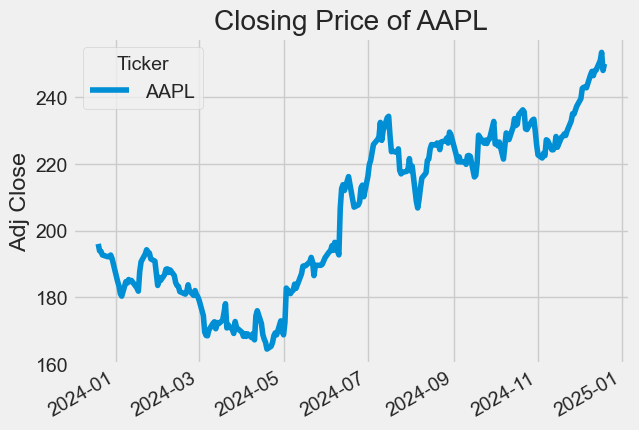

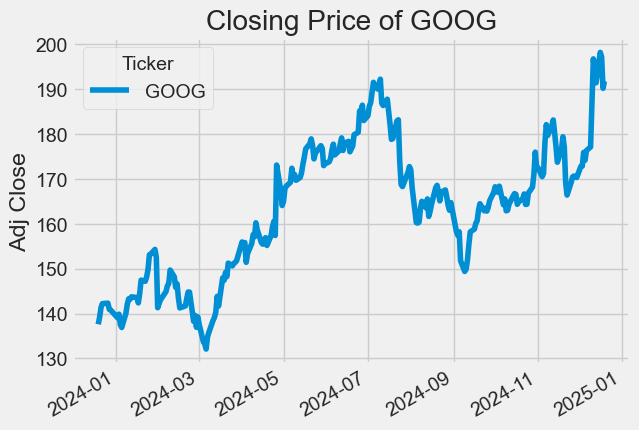

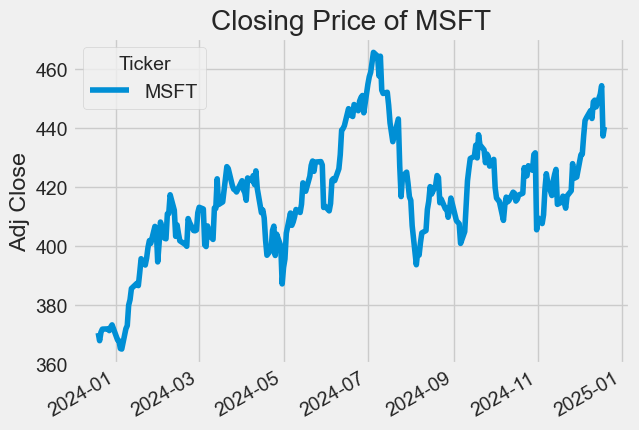

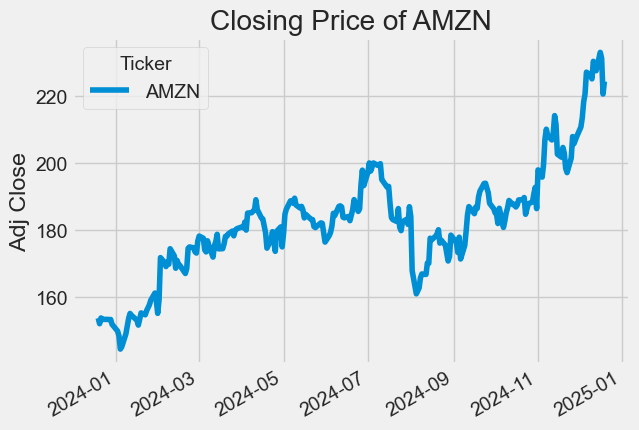

In [29]:
for i, company in enumerate(company_list, 1):
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

### Plot the total volume of stock being traded each day

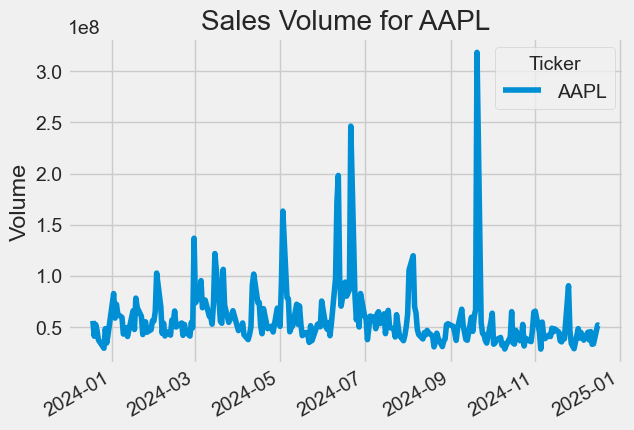

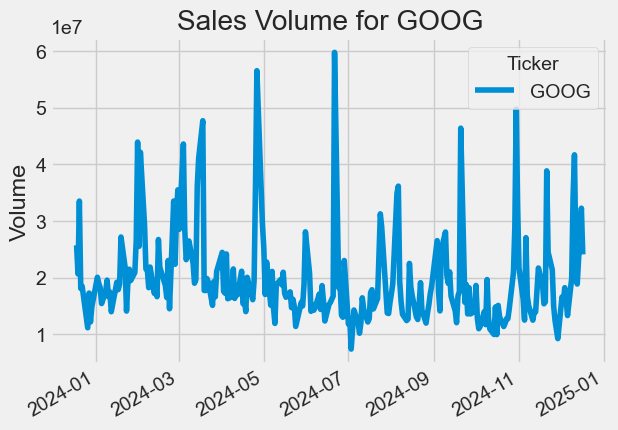

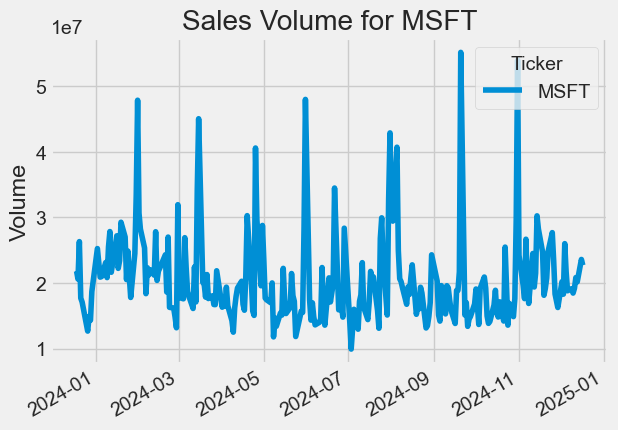

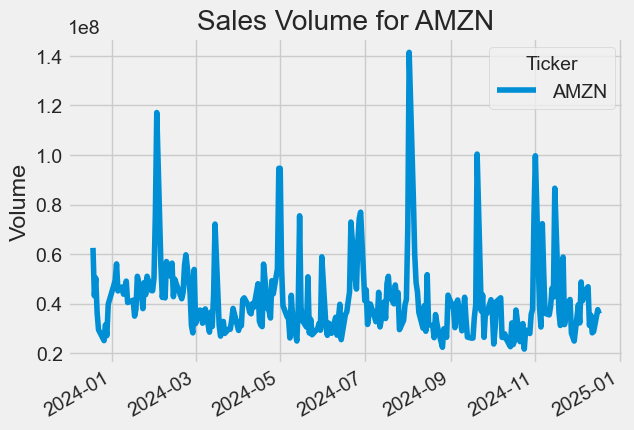

In [47]:
for i, company in enumerate(company_list, 1):
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

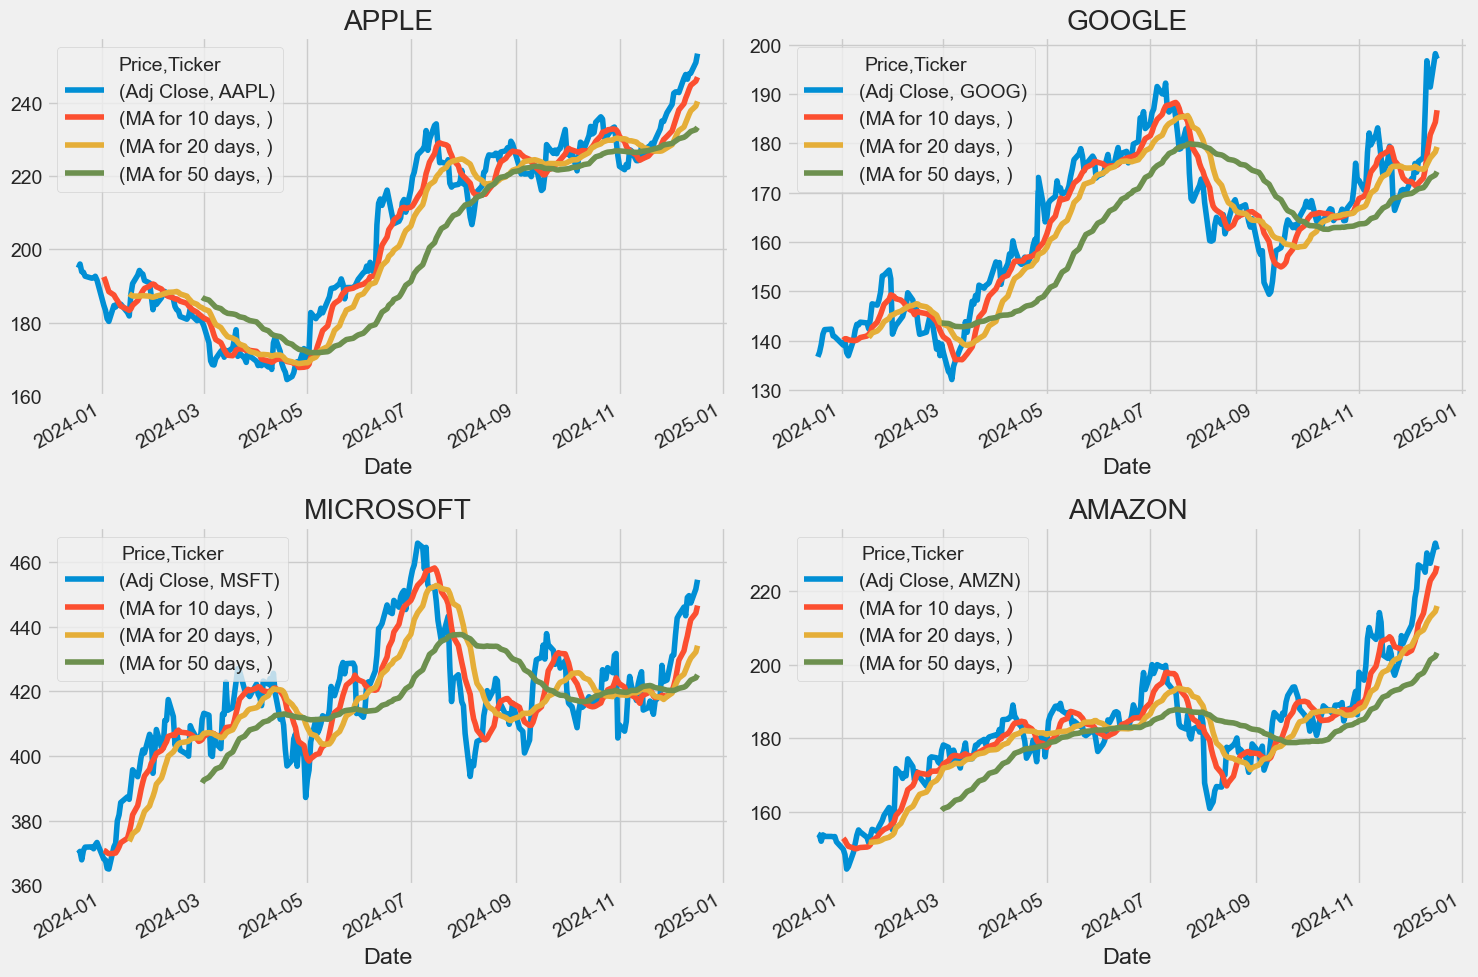

In [60]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

company_list[0][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

company_list[1][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

company_list[2][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

company_list[3][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

### using pct_change to find the percent change for each day


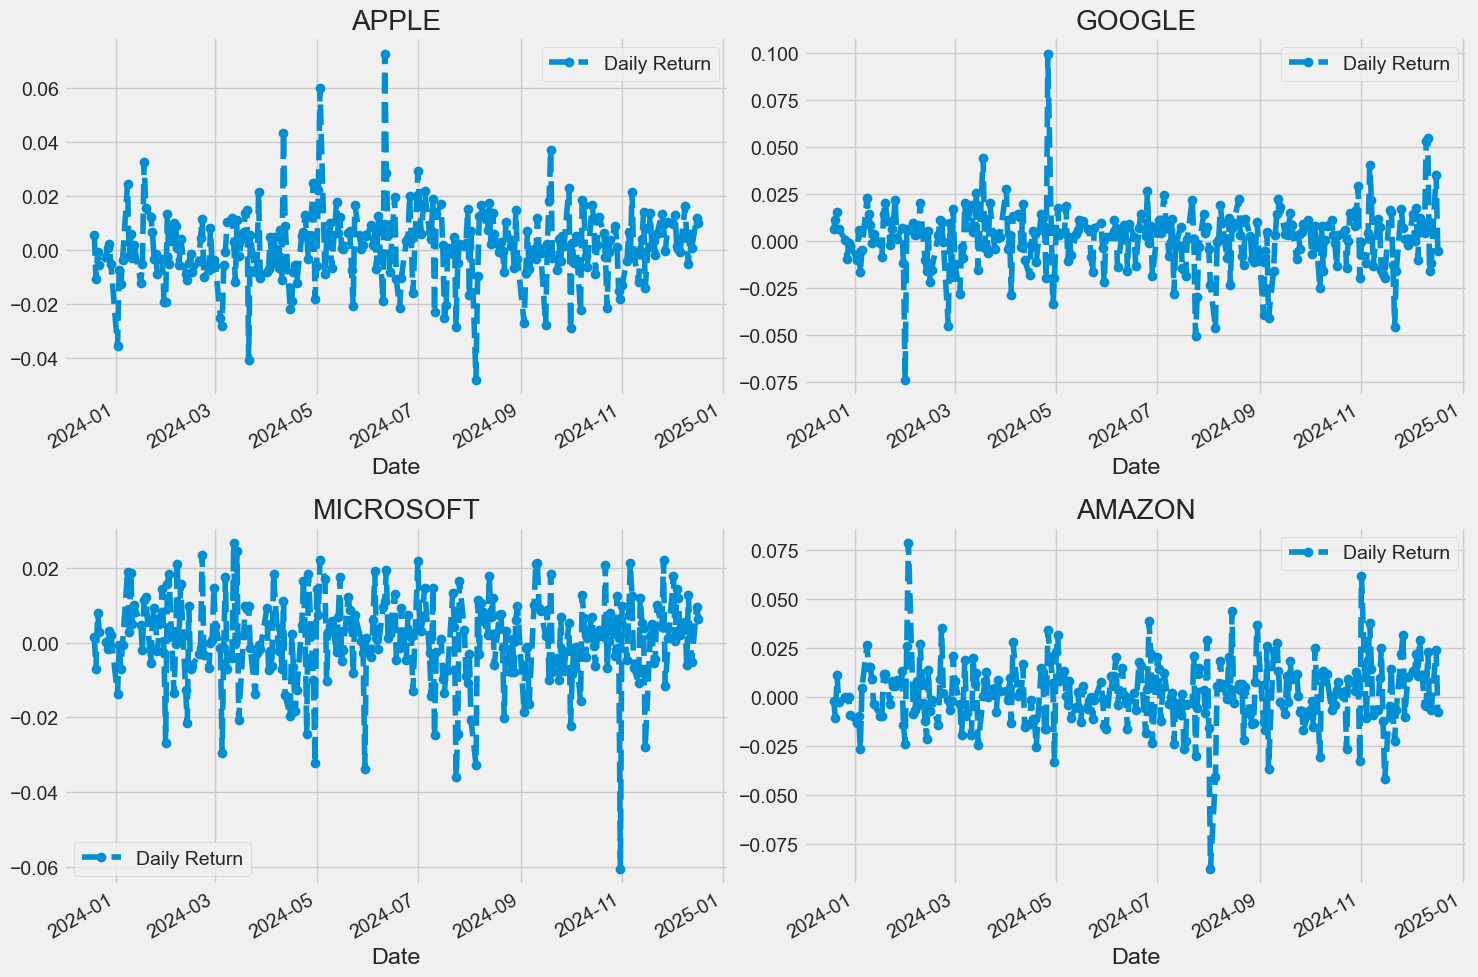

In [67]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

company_list[0]['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

company_list[1]['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

company_list[2]['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

company_list[3]['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

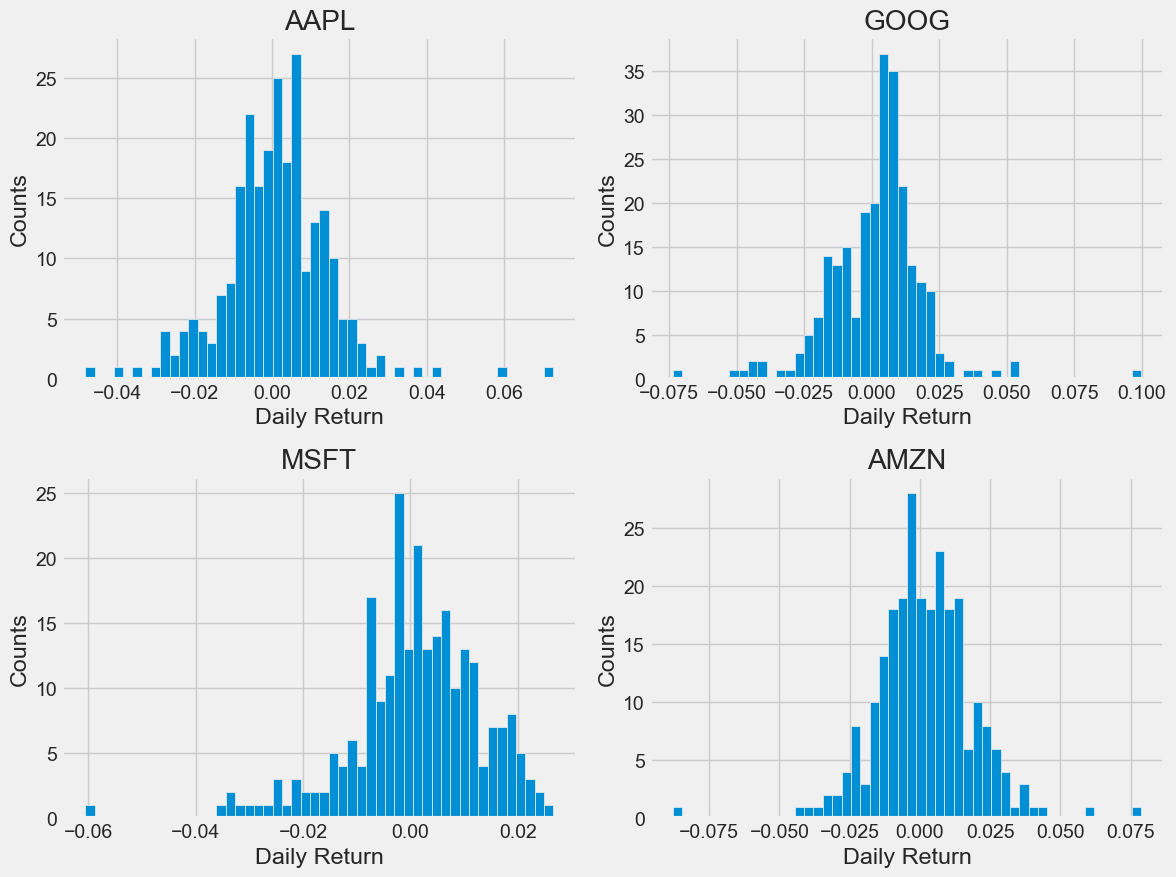

In [68]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{tech_list[i - 1]}')
    
plt.tight_layout()

In [6]:
import yfinance as yf
from datetime import datetime

tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

try:
    closing_df = yf.download(tech_list, start=start, end=end)['Adj Close']
    tech_rets = closing_df.pct_change()
    print(tech_rets.head())
except Exception as e:
    print(f"Error downloading data: {e}")


[*********************100%***********************]  4 of 4 completed

Ticker          AAPL      AMZN      GOOG      MSFT
Date                                              
2023-12-19       NaN       NaN       NaN       NaN
2023-12-20 -0.010714 -0.010859  0.011296 -0.007073
2023-12-21 -0.000770  0.011307  0.015323  0.007879
2023-12-22 -0.005547 -0.002730  0.006488  0.002784
2023-12-26 -0.002841 -0.000065  0.000701  0.000214


### Comparing Google to itself should show a perfectly linear relationship

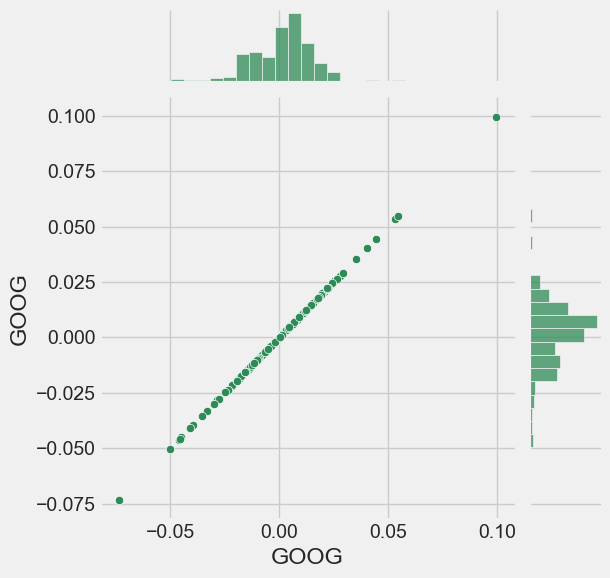

In [7]:
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

### Using joinplot to compare the daily returns of Google and Microsoft

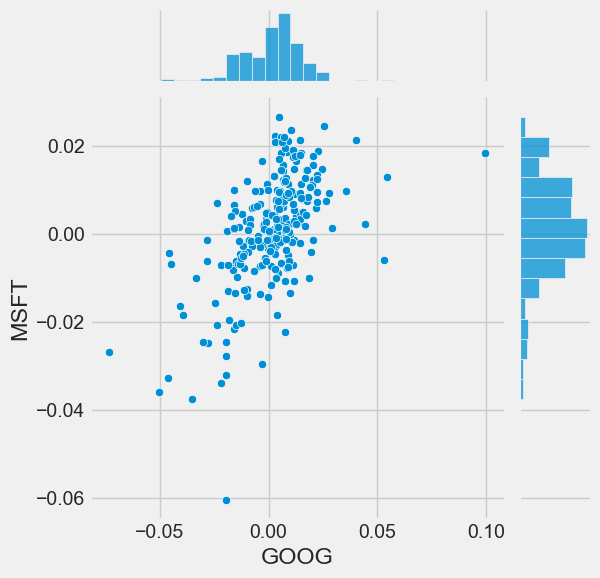

In [8]:
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

### Pairplot

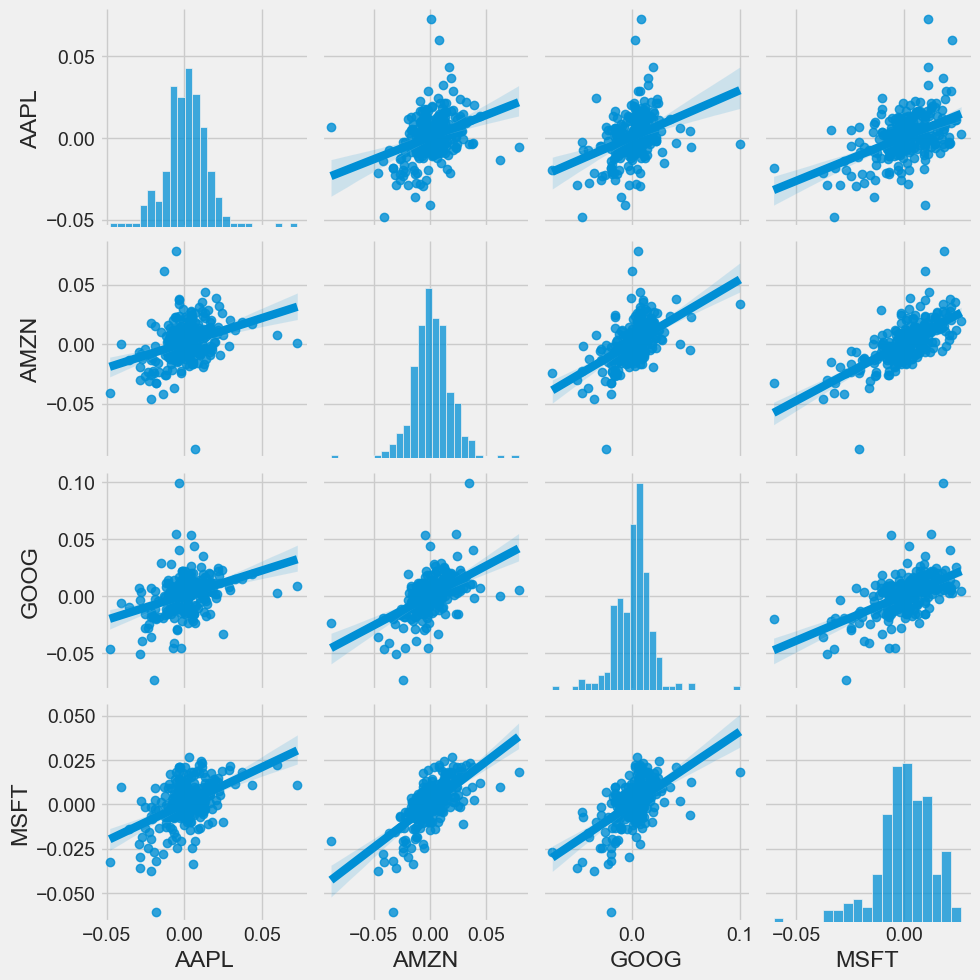

In [9]:
sns.pairplot(tech_rets, kind='reg')

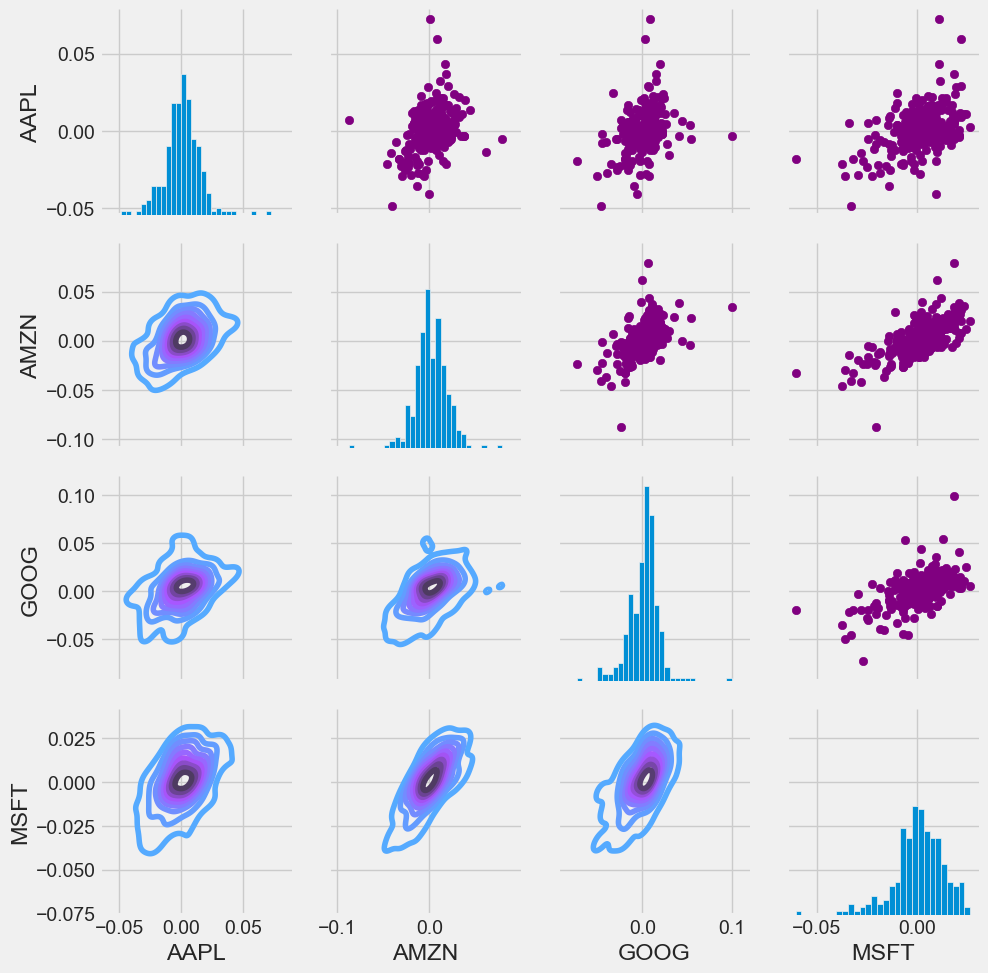

In [10]:
return_fig = sns.PairGrid(tech_rets.dropna())

return_fig.map_upper(plt.scatter, color='purple')

return_fig.map_lower(sns.kdeplot, cmap='cool_d')

return_fig.map_diag(plt.hist, bins=30)

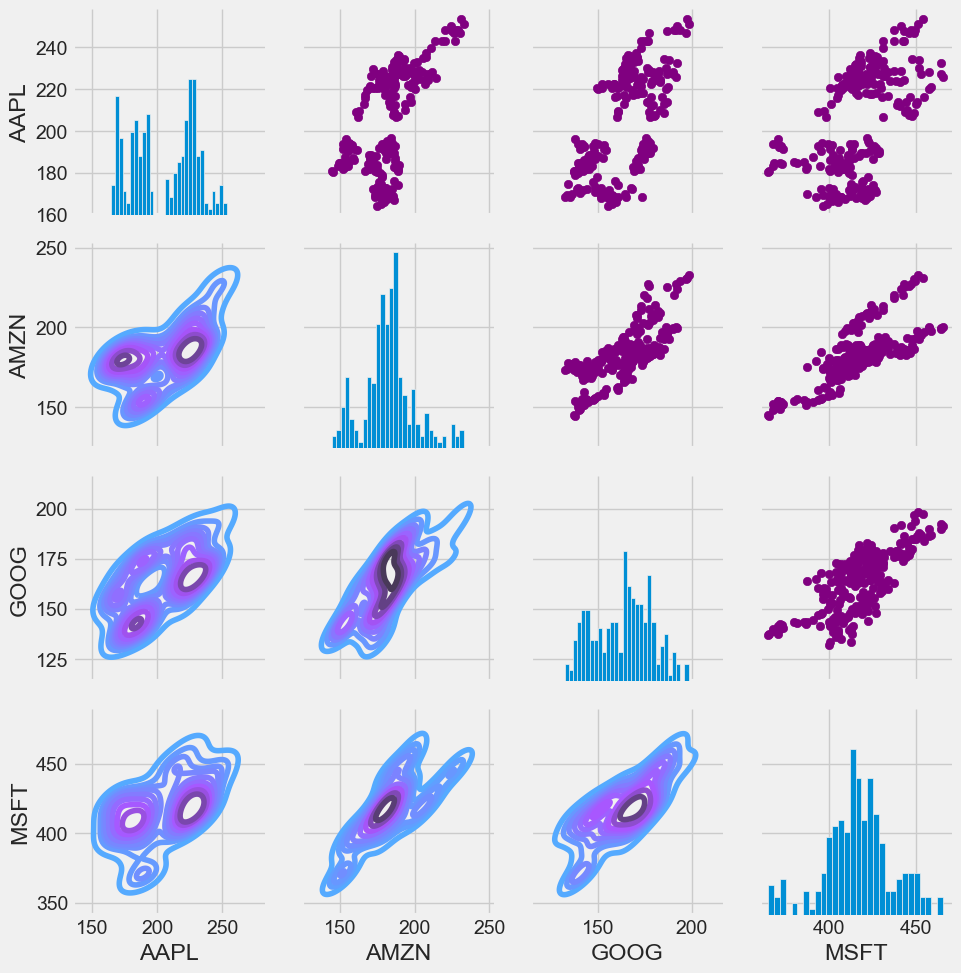

In [11]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

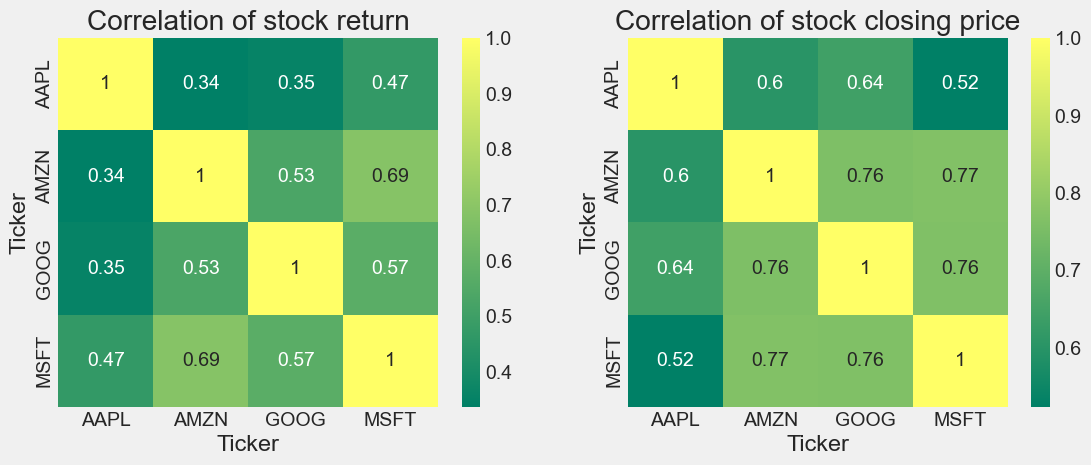

In [12]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

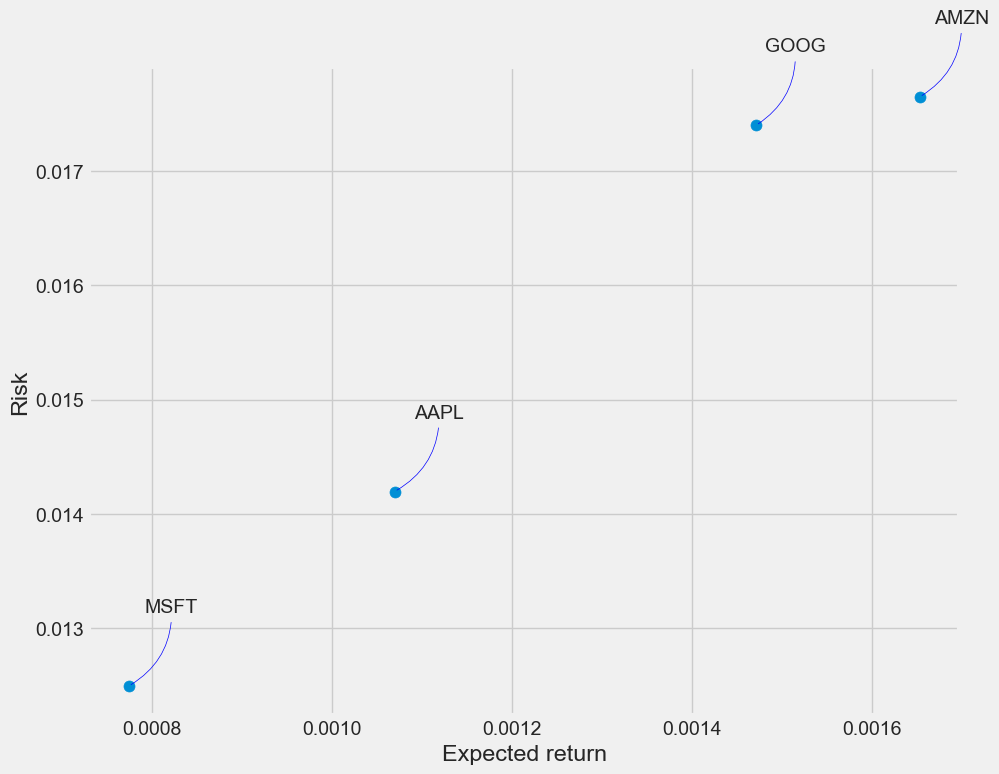

In [14]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [30]:
import yfinance as yf
from datetime import datetime

df = yf.download('AAPL', start='2012-01-01', end=datetime.now())

print(df.head())

[*********************100%***********************]  1 of 1 completed

Price       Adj Close      Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                                        
2012-01-03  12.388998  14.686786  14.732143  14.607143  14.621429  302220800
2012-01-04  12.455575  14.765714  14.810000  14.617143  14.642857  260022000
2012-01-05  12.593859  14.929643  14.948214  14.738214  14.819643  271269600
2012-01-06  12.725511  15.085714  15.098214  14.972143  14.991786  318292800
2012-01-09  12.705324  15.061786  15.276786  15.048214  15.196429  394024400


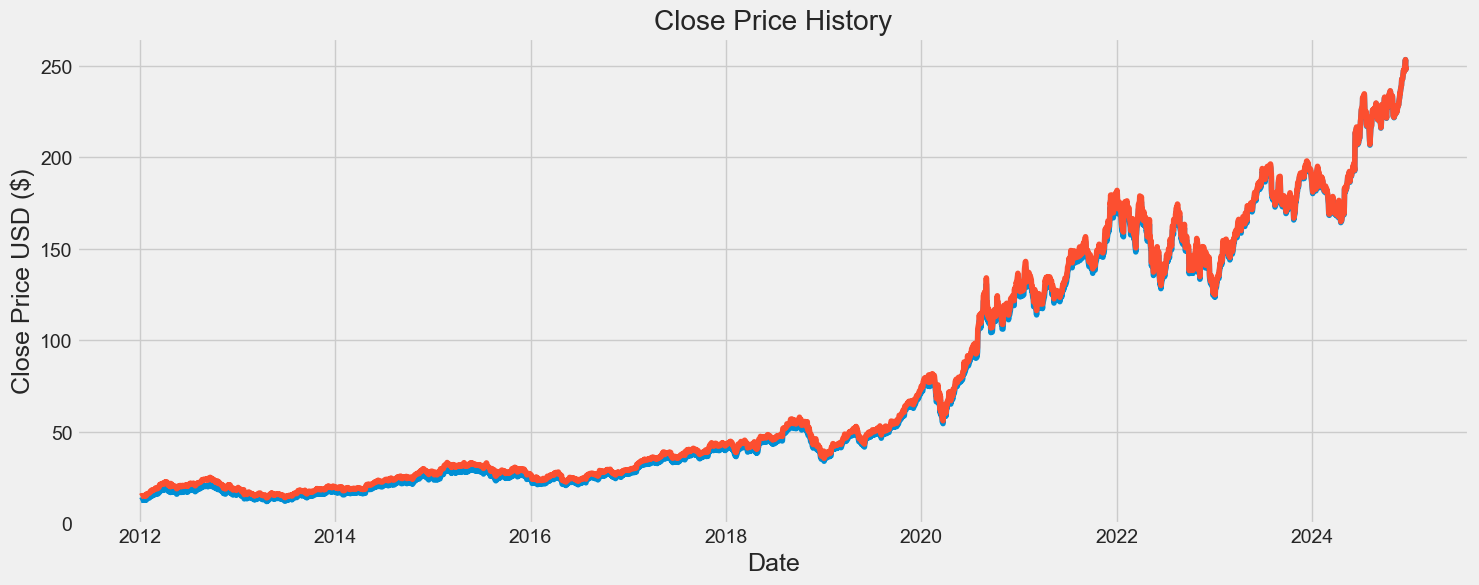

In [31]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Adj Close'])
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [1]:
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime

df = yf.download('AAPL', start='2012-01-01', end=datetime.now())

print(df.columns)

data = df[['Close']]

print(data.shape)

dataset = data.values

training_data_len = int(np.ceil(len(dataset) * 0.95))

print(training_data_len)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

print(scaled_data[:5])

[*********************100%***********************]  1 of 1 completed

MultiIndex([('Adj Close', 'AAPL'),
            (    'Close', 'AAPL'),
            (     'High', 'AAPL'),
            (      'Low', 'AAPL'),
            (     'Open', 'AAPL'),
            (   'Volume', 'AAPL')],
           names=['Price', 'Ticker'])
(3264, 1)
3101
[[0.00308637]
 [0.00341588]
 [0.00410025]
 [0.00475182]
 [0.00465192]]


### Create the training data set 

In [2]:
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.00308637, 0.00341588, 0.00410025, 0.00475182, 0.00465192,
       0.00487706, 0.00477418, 0.00460122, 0.00436564, 0.00509474,
       0.00575228, 0.0055495 , 0.0044387 , 0.00549881, 0.00445511,
       0.00836898, 0.00806631, 0.00846142, 0.00931576, 0.00983314,
       0.0097899 , 0.00963037, 0.01031026, 0.0109499 , 0.01167453,
       0.01284496, 0.01530362, 0.01534089, 0.01670963, 0.01773246,
       0.01597457, 0.01665148, 0.01663807, 0.01853611, 0.01826623,
       0.01876572, 0.0196633 , 0.02016279, 0.0216016 , 0.02264977,
       0.02295244, 0.02305831, 0.02126613, 0.02083373, 0.02089785,
       0.02258268, 0.02305682, 0.02407517, 0.02647568, 0.02967835,
       0.02907896, 0.02908045, 0.03139598, 0.03212061, 0.03160472,
       0.03113356, 0.03064302, 0.03227268, 0.03339094, 0.03385911])]
[np.float64(0.03270209242318128)]

[array([0.00308637, 0.00341588, 0.00410025, 0.00475182, 0.00465192,
       0.00487706, 0.00477418, 0.00460122, 0.00436564, 0.00509474,
       0.00575228, 0.00

### Build the LSTM model

In [3]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

c:\Users\sirap\Documents\Projects\Stock_Price_Prediction\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3041/3041 ━━━━━━━━━━━━━━━━━━━━ 139s 44ms/step - loss: 0.0023


### Create the testing data set

In [35]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step


np.float64(8.283865322696839)

C:\Users\sirap\AppData\Local\Temp\ipykernel_16216\2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


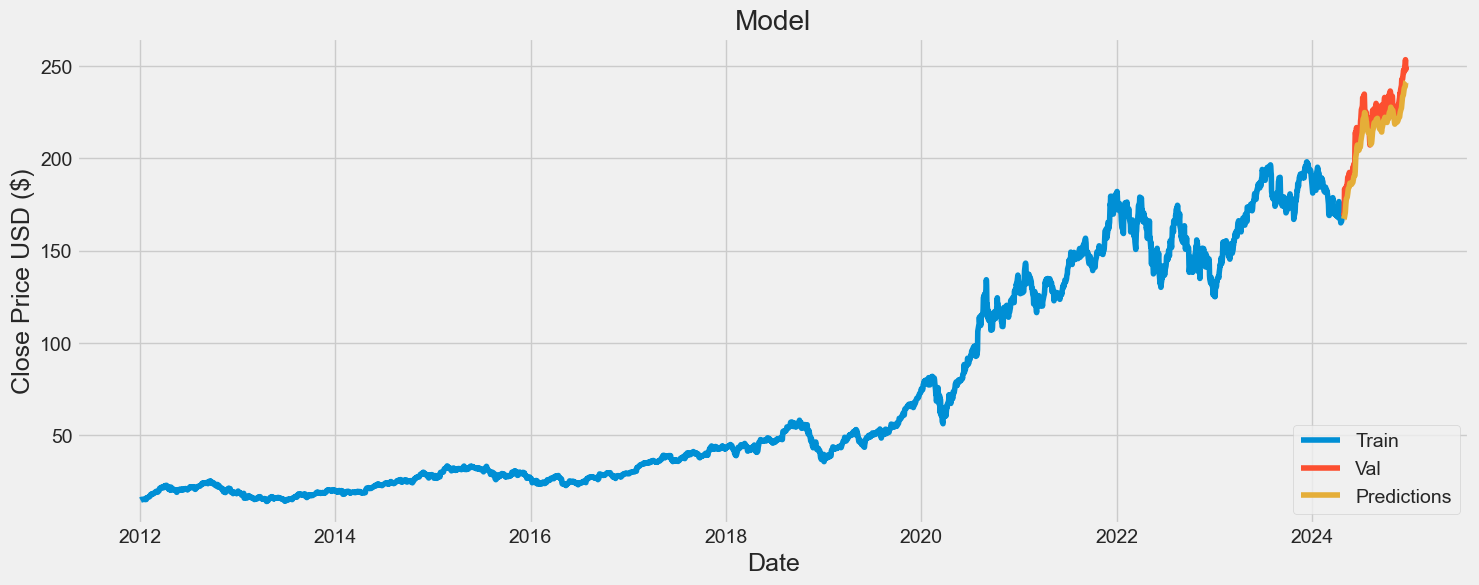

In [36]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [37]:
valid

Price,Close,Predictions
Ticker,AAPL,
Date,,
2024-04-30,170.330002,167.150665
2024-05-01,169.300003,167.695023
2024-05-02,173.029999,167.713287
2024-05-03,183.380005,168.242157
2024-05-06,181.710007,170.811752
...,...,...
2024-12-13,248.130005,238.281006
2024-12-16,251.039993,238.892853


### Save the trained LSTM model

In [40]:
import pickle
from keras.models import load_model

model.save('stock_prediction_model.keras')

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)